### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
# Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

In [3]:
# Import the csv into data frame
vehi_df = pd.read_csv("vehicle.csv").dropna()

In [4]:
vehi_df.shape

(813, 19)

In [5]:
vehi_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [6]:
vehi_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [7]:
vehi_df["class"] = vehi_df["class"].astype('category')

In [8]:
vehi_df.dtypes

compactness                       int64
circularity                     float64
distance_circularity            float64
radius_ratio                    float64
pr.axis_aspect_ratio            float64
max.length_aspect_ratio           int64
scatter_ratio                   float64
elongatedness                   float64
pr.axis_rectangularity          float64
max.length_rectangularity         int64
scaled_variance                 float64
scaled_variance.1               float64
scaled_radius_of_gyration       float64
scaled_radius_of_gyration.1     float64
skewness_about                  float64
skewness_about.1                float64
skewness_about.2                float64
hollows_ratio                     int64
class                          category
dtype: object

In [9]:
# Checking the central values and distribution
vehi_df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,93.656827,44.803198,82.04305,169.098401,61.774908,8.599016,168.563346,40.98893,20.558426,147.891759,188.377614,438.382534,174.252153,72.399754,6.351784,12.687577,188.979090,195.729397
std,8.233751,6.146659,15.78307,33.615402,7.973000,4.677174,33.082186,7.80338,2.573184,14.504648,31.165873,175.270368,32.332161,7.475994,4.921476,8.926951,6.153681,7.398781
min,73.000000,33.000000,40.00000,104.000000,47.000000,2.000000,112.000000,26.00000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.00000,141.000000,57.000000,7.000000,146.000000,33.00000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,93.000000,44.000000,79.00000,167.000000,61.000000,8.000000,157.000000,43.00000,20.000000,146.000000,179.000000,364.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,100.000000,49.000000,98.00000,195.000000,65.000000,10.000000,198.000000,46.00000,23.000000,159.000000,217.000000,586.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.00000,333.000000,138.000000,55.000000,265.000000,61.00000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

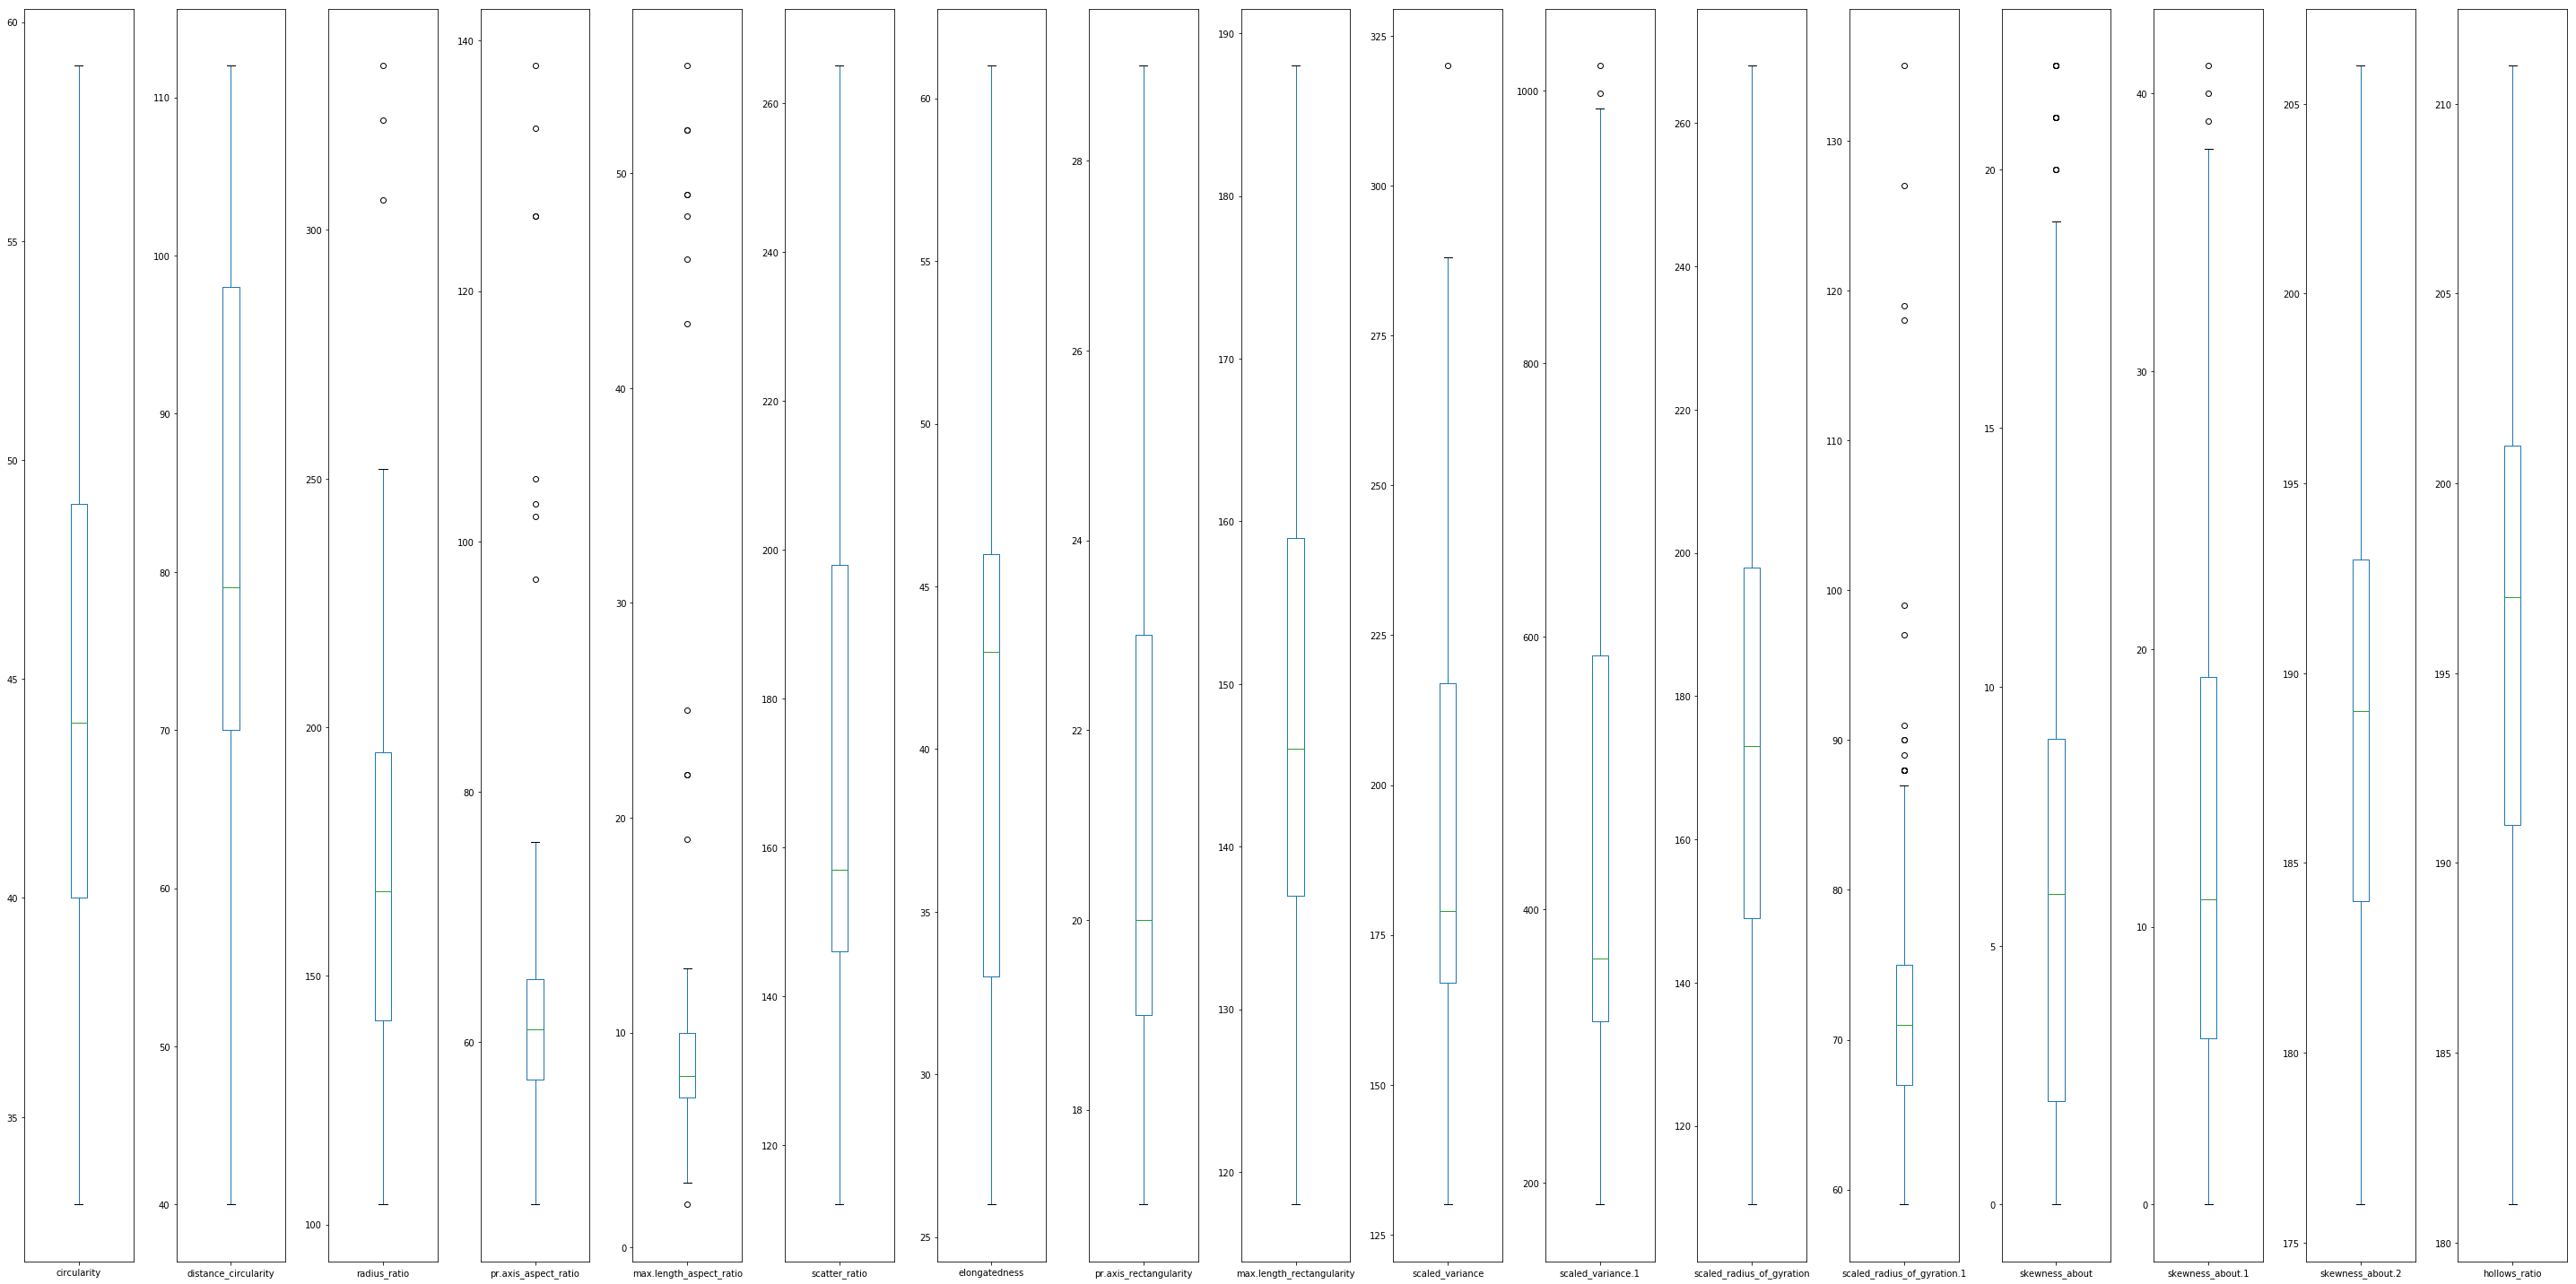

In [10]:
vehi_df.iloc[:, 1:].plot(kind='box',figsize=(40,20),subplots=True)
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000178FDA74E10>,
      dtype=object)

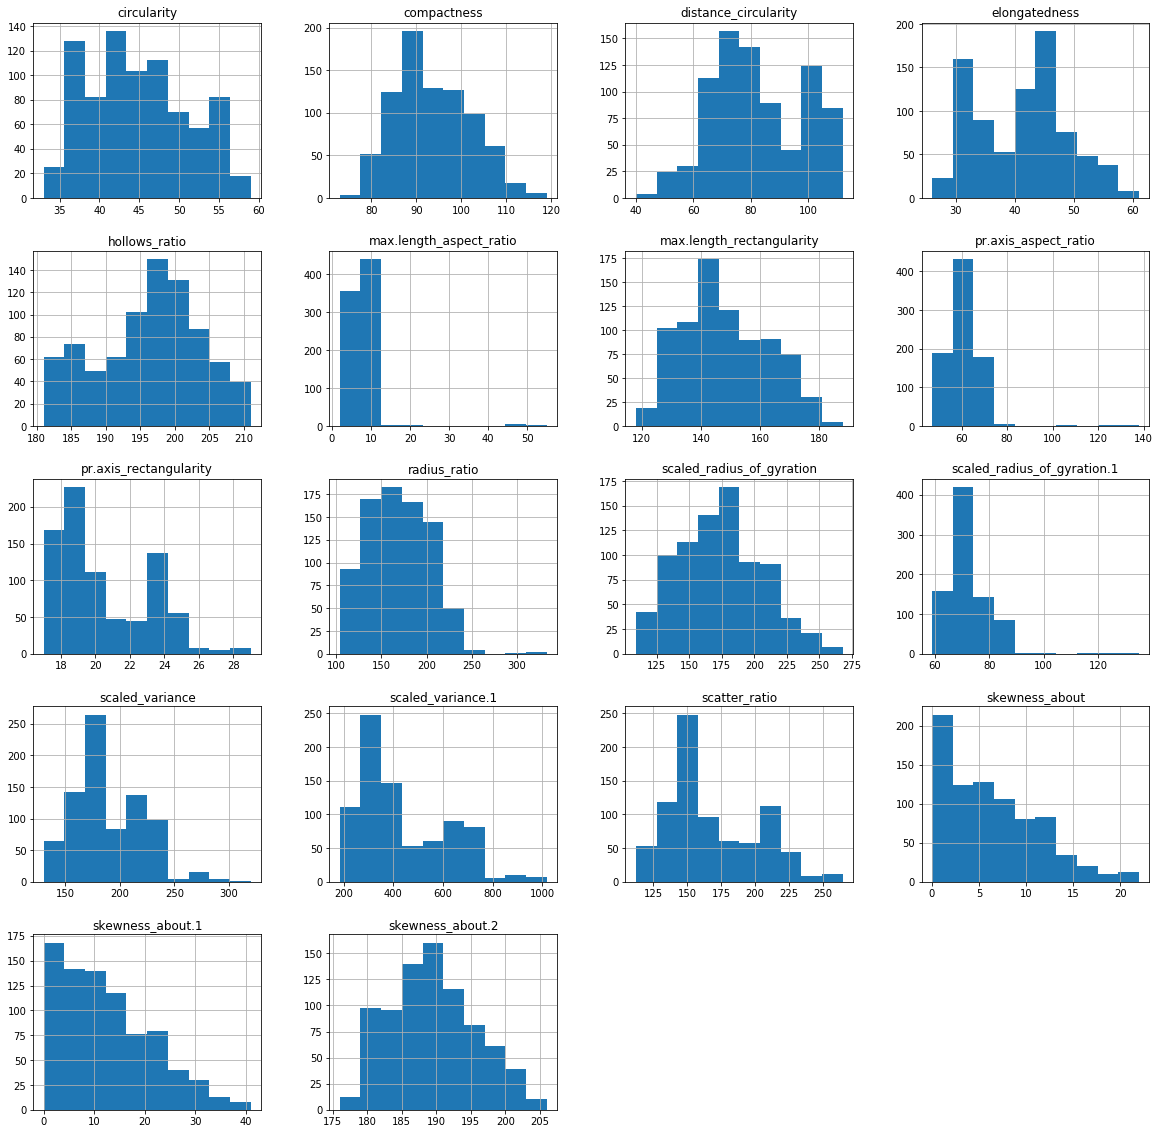

In [11]:
# Plotting the histogram to check the distribution
vehi_df.hist(figsize = [20,20]) 

In [12]:
# Checking the co-relation
vehi_corr = vehi_df.corr().iloc[:,:]
vehi_corr.sort_values(by='compactness',ascending = False)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.689885,0.789955,0.688130,0.090557,0.150369,0.814026,-0.788051,0.814227,0.674902,0.764386,0.820240,0.581405,-0.258437,0.231648,0.168384,0.296195,0.372806
scaled_variance.1,0.820240,0.850932,0.891789,0.731773,0.100668,0.150069,0.996396,-0.956858,0.992119,0.796230,0.947617,1.000000,0.791997,-0.037903,0.072393,0.220054,0.011782,0.125118
pr.axis_rectangularity,0.814227,0.856137,0.897261,0.716210,0.086992,0.167514,0.991992,-0.950345,1.000000,0.811979,0.935653,0.992119,0.792895,-0.033769,0.078701,0.231171,-0.017383,0.117202
scatter_ratio,0.814026,0.858149,0.909023,0.743470,0.113696,0.171445,1.000000,-0.973413,0.991992,0.808154,0.950067,0.996396,0.795748,-0.045632,0.070118,0.227375,0.009967,0.138424
distance_circularity,0.789955,0.797704,1.000000,0.771404,0.163386,0.265591,0.909023,-0.912713,0.897261,0.773459,0.865683,0.891789,0.705689,-0.238145,0.110280,0.277851,0.145258,0.343228
scaled_variance,0.764386,0.806108,0.865683,0.806788,0.290375,0.331124,0.950067,-0.937846,0.935653,0.744760,1.000000,0.947617,0.776051,0.099371,0.034228,0.208966,0.017828,0.104989
circularity,0.689885,1.000000,0.797704,0.623950,0.155023,0.251619,0.858149,-0.825108,0.856137,0.965366,0.806108,0.850932,0.935594,0.049070,0.141726,-0.001975,-0.113902,0.049331
radius_ratio,0.688130,0.623950,0.771404,1.000000,0.667375,0.452460,0.743470,-0.795761,0.716210,0.570478,0.806788,0.731773,0.544636,-0.175348,0.044693,0.178079,0.375591,0.470895
max.length_rectangularity,0.674902,0.965366,0.773459,0.570478,0.133553,0.309180,0.808154,-0.771099,0.811979,1.000000,0.744760,0.796230,0.865240,0.031098,0.130356,0.013045,-0.108019,0.086792
scaled_radius_of_gyration,0.581405,0.935594,0.705689,0.544636,0.135663,0.197179,0.795748,-0.761563,0.792895,0.865240,0.776051,0.791997,1.000000,0.177284,0.162397,-0.041153,-0.224495,-0.102167


In [13]:
# Count the types of cars
vehi_df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

In [14]:
# change the datatype of cars 
vehi_class = {'car':1,'bus': 2, 'van':3}
vehi_df['class'] = vehi_df['class'].map(vehi_class)

In [15]:
vehi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

C:\Users\msrikanta\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


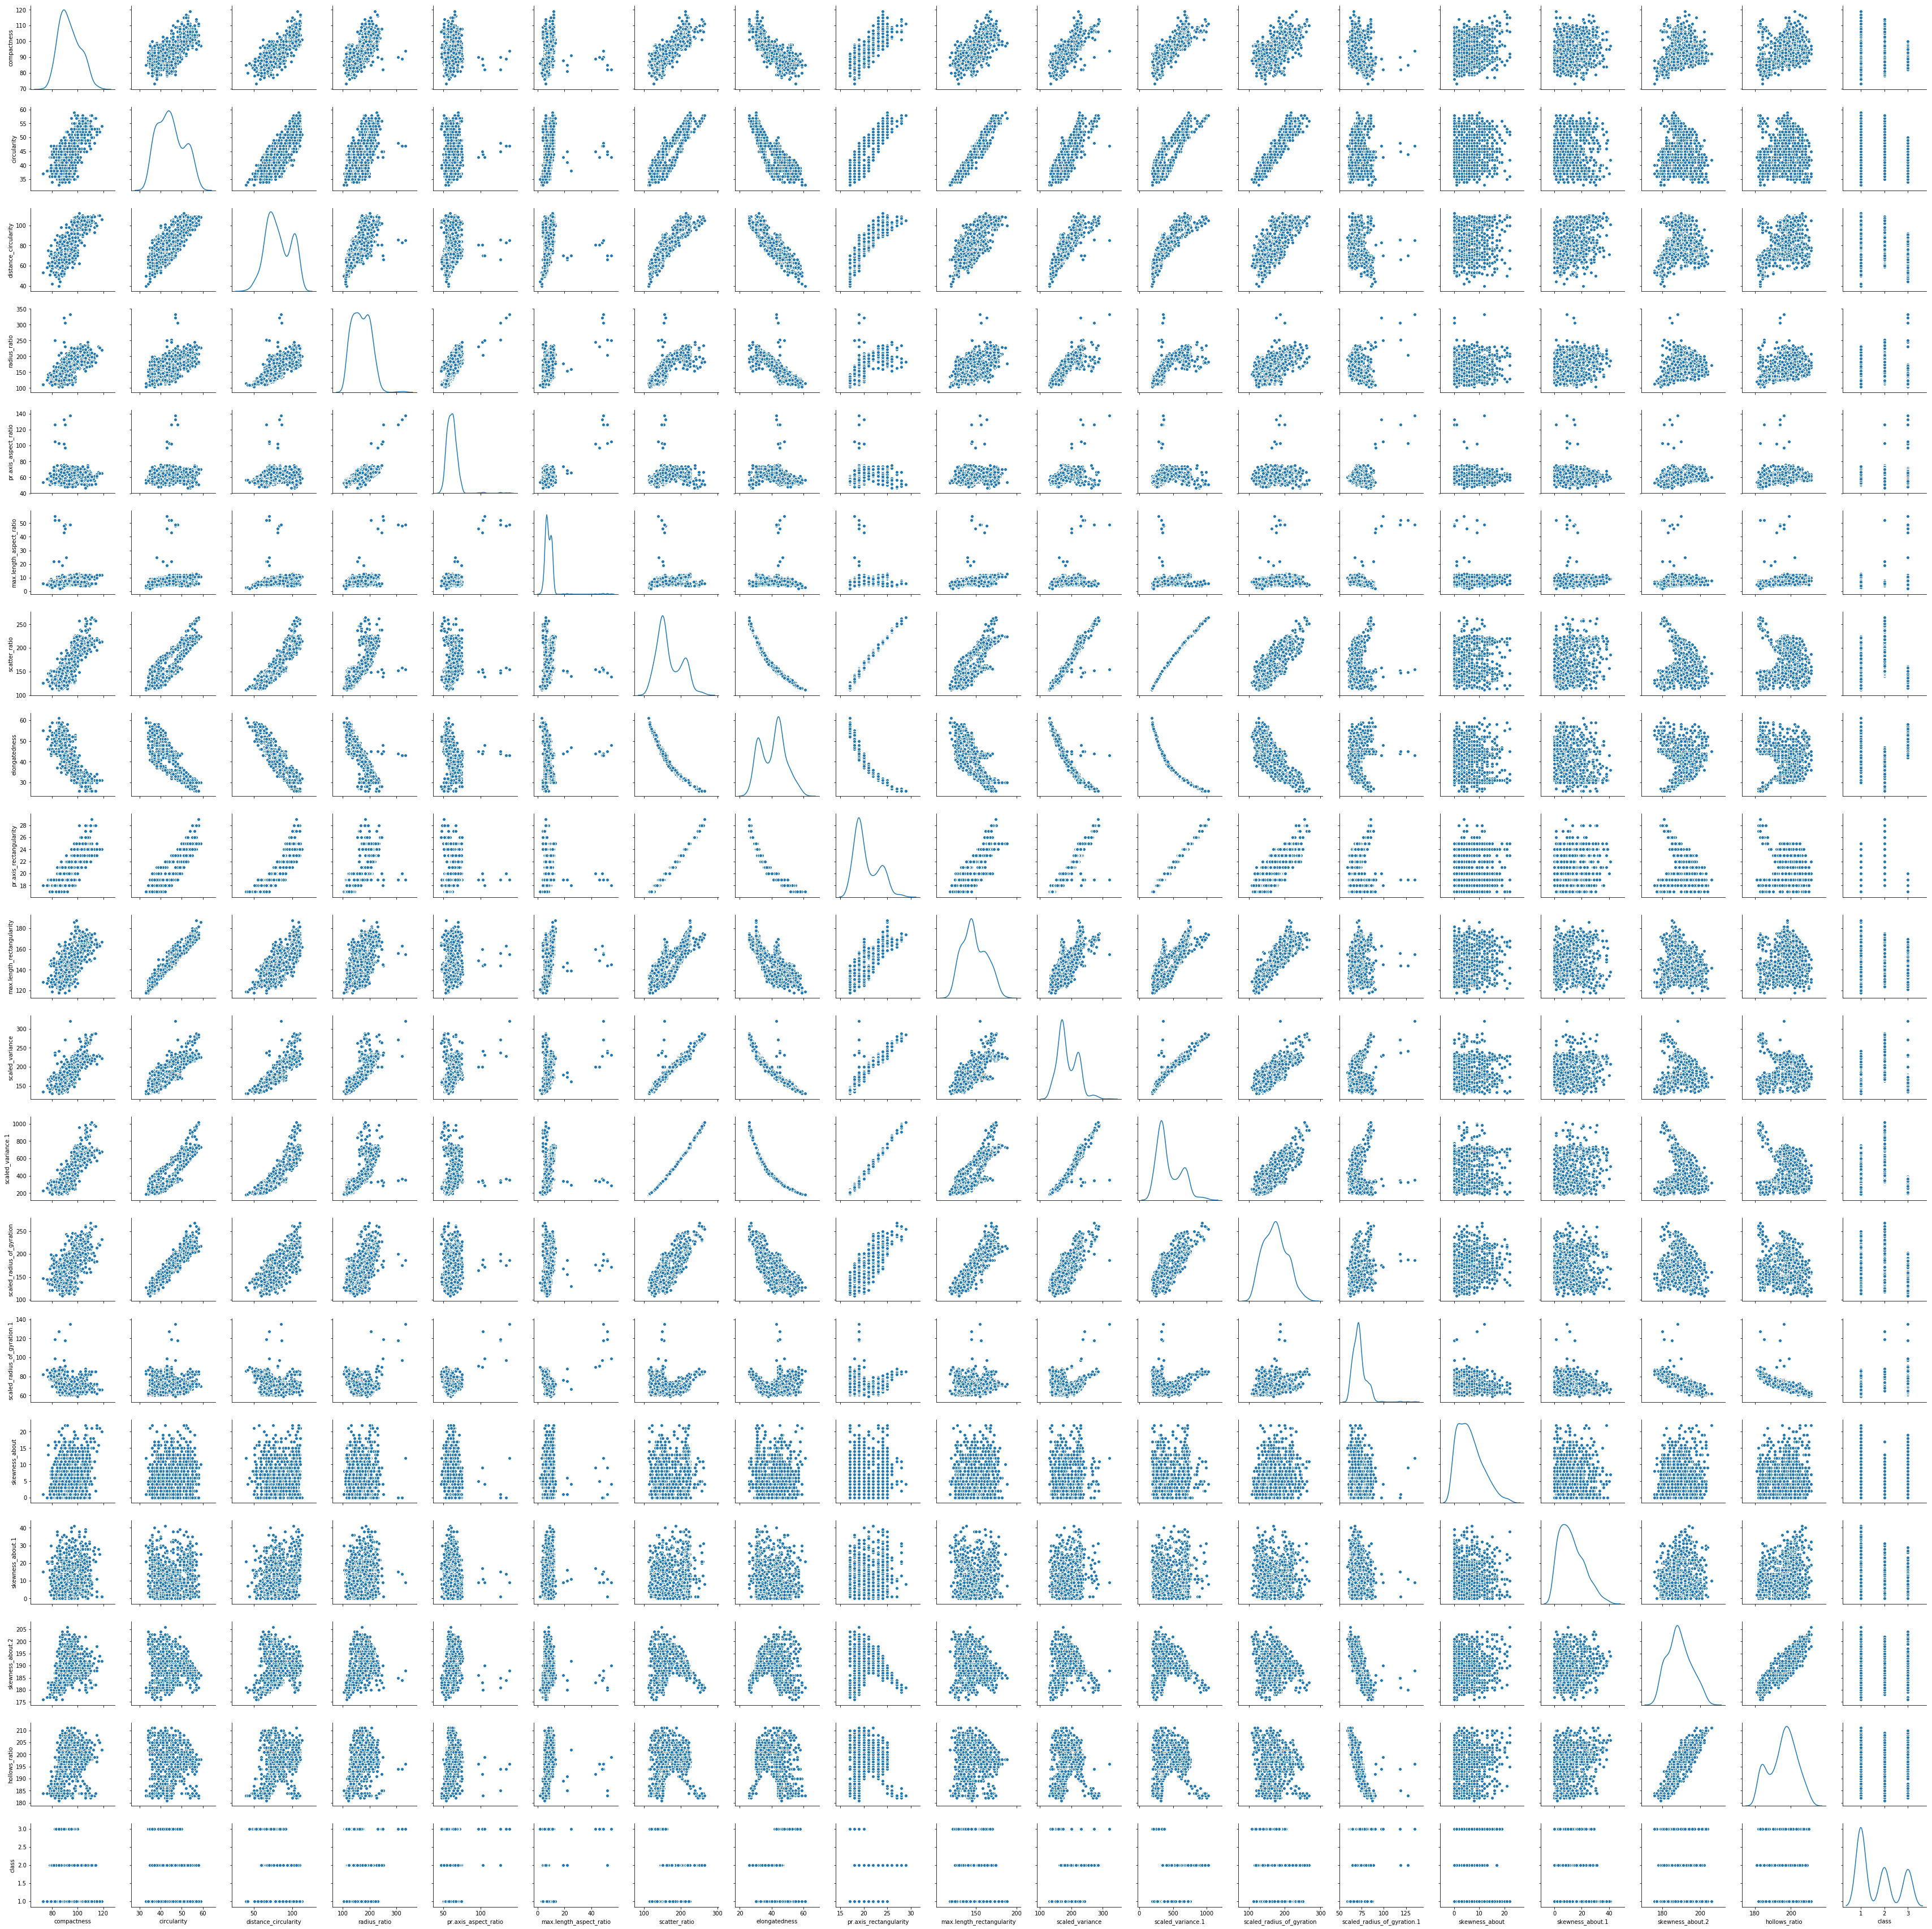

In [16]:
# Plotting all variables on scatter matrix
sns.pairplot(vehi_df, diag_kind='kde')

There are atleast 3 peaks so there must be 3 or more clusters

### Check for any missing values in the data 

In [17]:
# Check if any columns are missing values
vehi_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [18]:
vehi_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [19]:
# Check if any column has Zero value
vehi_df.columns[(vehi_df == 0).all()]

Index([], dtype='object')

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [20]:
vehi_df_z = vehi_df.apply(zscore)
vehi_df_z.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837,1.542453
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318,1.542453
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596,-0.890164
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243,1.542453
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531,0.326144


### K - Means Clustering

### 4. Assign a dummy array called distortion

You can later use this array to plot the elbow plot

In [32]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

cluster_range = range( 2, 10)   
distortion = []
cluster_sil_scores = []
   
for num_clusters in cluster_range:
    # K means ++ has n_init = 5 by default
    clusters = KMeans (num_clusters, n_init = 5)
    clusters.fit(vehi_df_z)
    labels = clusters.labels_                     # capture the cluster lables
    centroids = clusters.cluster_centers_         # capture the centroids
    #distortion.append( clusters.inertia_ )        # capture the intertia = variance within clusters
    # Getting Sum of sq errors
    distortion.append( (np.sum
                        (np.square
                         (np.min
                          (cdist
                           (vehi_df_z,clusters.cluster_centers_),axis=1)
                         )
                        )
                       )/vehi_df_z.shape[0])
    
    cluster_sil_scores.append(metrics.silhouette_score(vehi_df_z, labels, metric='euclidean'))
    
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": distortion, "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,Avg Sil Score,cluster_errors,num_clusters
0,0.379062,11.390099,2
1,0.280322,9.449264,3
2,0.293323,7.825965,4
3,0.227112,7.141702,5
4,0.208082,6.465525,6
5,0.230656,5.974517,7
6,0.221875,5.568525,8
7,0.209761,5.294588,9


### 5. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

Above table has the values

### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

Text(0,0.5,'Average Distortion')

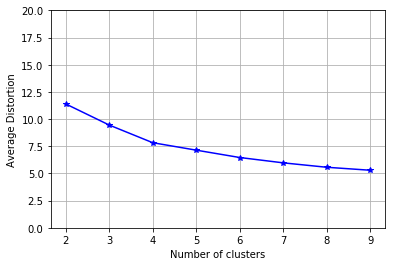

In [33]:
fig1 = plt.figure()
ex = fig1.add_subplot(111)
ex.plot( clusters_df.num_clusters, clusters_df.cluster_errors,'b*-')
plt.grid(True)
plt.ylim([0,20])
plt.xlabel("Number of clusters")
plt.ylabel("Average Distortion")

### Find out the optimal value of K

Optimal value is 4

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [34]:
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(vehi_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [36]:
centroids = cluster.cluster_centers_
centroids

array([[-8.77842942e-01, -4.87082285e-01, -8.33243548e-01,
        -1.01885144e+00, -4.88162169e-01, -2.77906176e-01,
        -7.65580455e-01,  8.37279274e-01, -7.37075016e-01,
        -4.45540016e-01, -7.79698040e-01, -7.69492355e-01,
        -3.75855523e-01,  6.77679177e-01, -1.02397212e-01,
        -3.13702952e-01, -9.51147942e-01, -9.87225000e-01,
         4.56784704e-01],
       [ 1.15063017e+00,  1.18492237e+00,  1.21372045e+00,
         9.72856669e-01,  9.24701570e-02,  2.20330516e-01,
         1.29702324e+00, -1.21324488e+00,  1.30032558e+00,
         1.09911438e+00,  1.20602799e+00,  1.30784934e+00,
         1.09483963e+00, -1.11538437e-01,  1.69914670e-01,
         2.66641298e-01,  2.76491851e-03,  1.91911857e-01,
        -6.85862367e-01],
       [-1.85231303e-01, -6.17956232e-01, -2.99495734e-01,
         8.80686710e-03,  1.91534803e-01, -1.82593508e-01,
        -4.33875136e-01,  2.89588900e-01, -4.63848913e-01,
        -5.85465091e-01, -4.00734470e-01, -4.38501611e-01,
    

### 7. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [37]:
centroid_df = pd.DataFrame(centroids, columns = list(vehi_df_z) )
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,-0.877843,-0.487082,-0.833244,-1.018851,-0.488162,-0.277906,-0.765580,0.837279,-0.737075,-0.445540,-0.779698,-0.769492,-0.375856,0.677679,-0.102397,-0.313703,-0.951148,-0.987225,0.456785
1,1.150630,1.184922,1.213720,0.972857,0.092470,0.220331,1.297023,-1.213245,1.300326,1.099114,1.206028,1.307849,1.094840,-0.111538,0.169915,0.266641,0.002765,0.191912,-0.685862
2,-0.185231,-0.617956,-0.299496,0.008807,0.191535,-0.182594,-0.433875,0.289589,-0.463849,-0.585465,-0.400734,-0.438502,-0.646952,-0.695859,-0.048933,0.065553,0.938230,0.792296,0.151763
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651,1.238375


### Use kmeans.labels_ function to print out the labels of the classes

In [38]:
labels = clusters.labels_
(labels)

array([0, 0, 1, 4, 6, 4, 4, 4, 4, 2, 0, 0, 7, 1, 5, 7, 1, 3, 5, 4, 4, 1,
       0, 5, 1, 7, 5, 0, 4, 2, 1, 2, 3, 6, 1, 3, 1, 5, 0, 2, 1, 0, 0, 3,
       0, 7, 5, 2, 1, 4, 8, 4, 7, 0, 1, 5, 7, 5, 5, 3, 7, 5, 1, 0, 7, 1,
       2, 5, 0, 1, 2, 3, 0, 1, 4, 5, 2, 8, 0, 5, 7, 5, 1, 2, 1, 0, 3, 1,
       5, 0, 1, 3, 6, 4, 4, 4, 7, 7, 2, 3, 7, 4, 0, 5, 5, 0, 0, 7, 1, 7,
       5, 0, 4, 5, 0, 0, 3, 0, 0, 7, 1, 2, 2, 5, 1, 6, 0, 4, 5, 0, 2, 1,
       3, 7, 1, 0, 2, 4, 4, 7, 7, 2, 1, 0, 8, 2, 0, 2, 5, 1, 2, 4, 1, 1,
       2, 1, 3, 5, 1, 8, 4, 1, 0, 2, 2, 2, 3, 1, 5, 4, 5, 1, 7, 2, 7, 1,
       2, 7, 0, 8, 2, 3, 1, 3, 3, 3, 0, 2, 1, 1, 4, 0, 7, 3, 1, 2, 4, 2,
       1, 5, 3, 1, 3, 4, 1, 0, 3, 5, 4, 1, 4, 1, 3, 5, 5, 3, 1, 4, 0, 2,
       1, 3, 2, 7, 3, 1, 0, 5, 2, 2, 1, 5, 1, 0, 4, 0, 1, 2, 2, 1, 1, 5,
       2, 4, 4, 7, 3, 7, 4, 5, 3, 7, 4, 8, 4, 3, 5, 1, 2, 7, 3, 3, 1, 0,
       0, 1, 5, 4, 6, 0, 4, 8, 4, 7, 5, 2, 2, 1, 7, 2, 4, 3, 0, 1, 1, 1,
       7, 0, 0, 1, 3, 5, 4, 7, 5, 1, 8, 3, 7, 2, 3,

In [40]:
prediction=cluster.predict(vehi_df_z)
vehi_df_z["GROUP"] = prediction

In [42]:
vehi_df_z.groupby("GROUP").count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
GROUP,,,,,,,,,,,,,,,,,,,
0,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270
1,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256
2,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279
3,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


Visual identification of centroids using box plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017891C63048>,
      dtype=object)

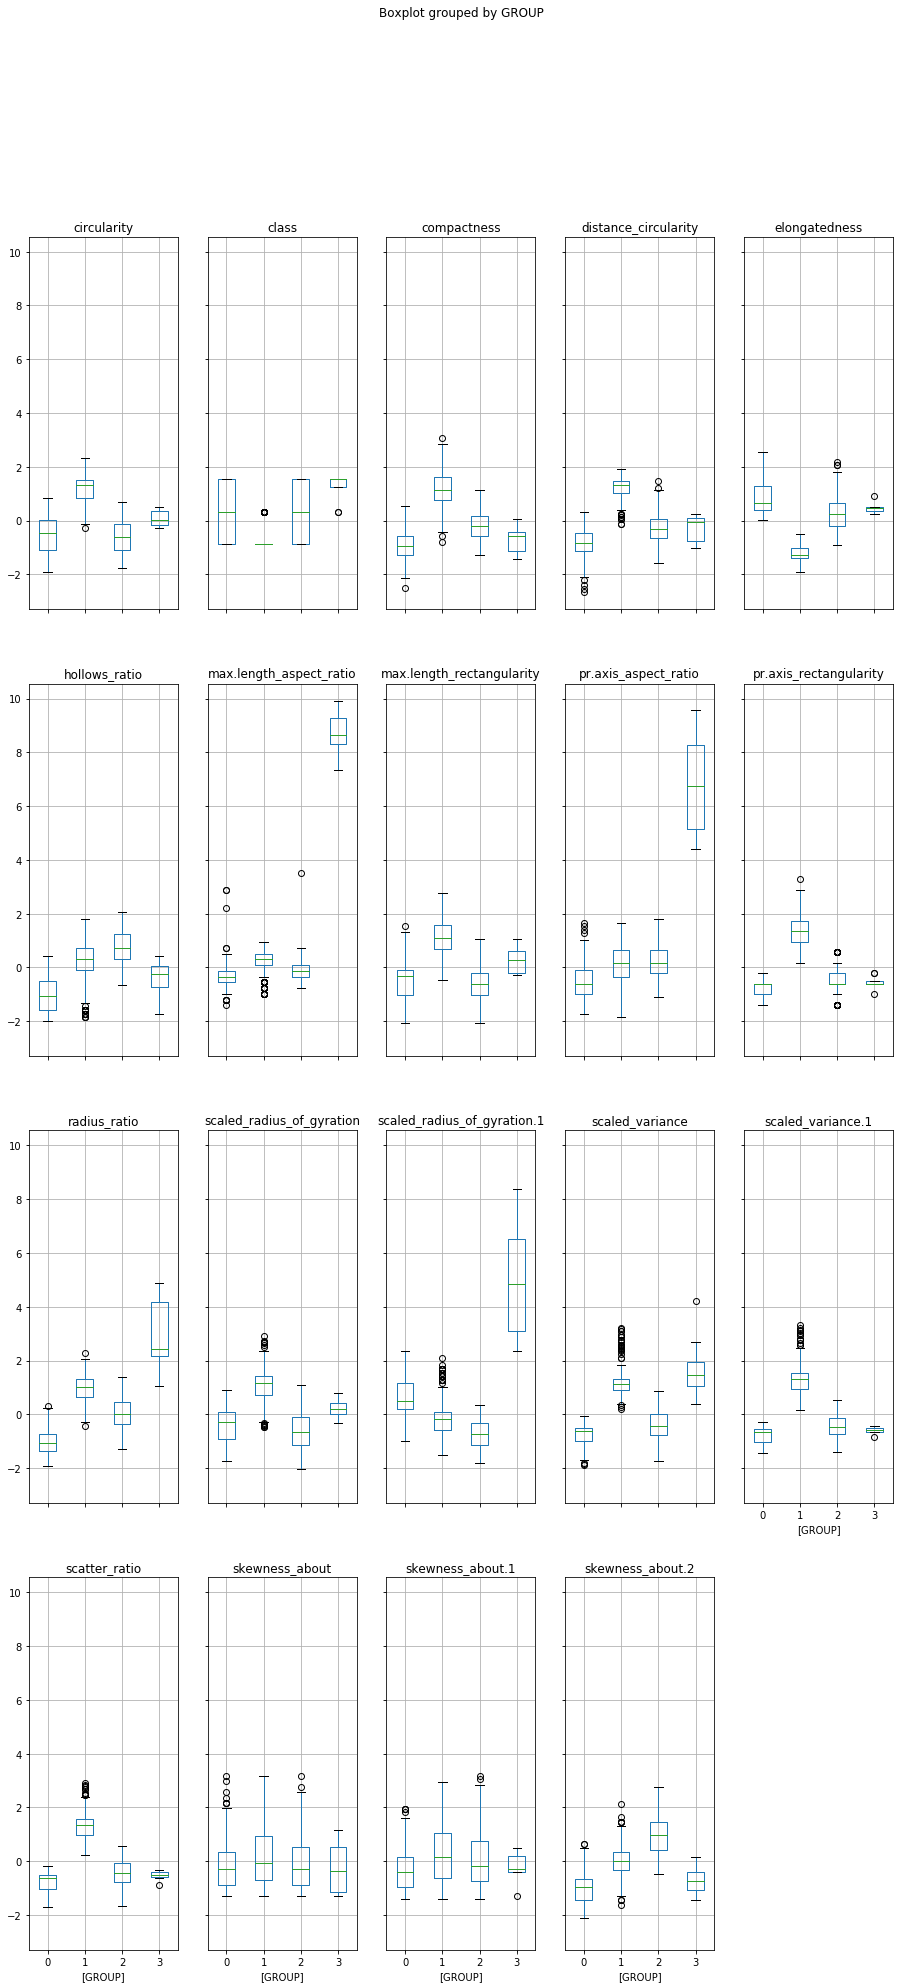

In [43]:
vehi_df_z.boxplot(by = 'GROUP',  layout=(5,5), figsize=(15, 40))

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [46]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [47]:
df_a = pd.DataFrame(a, columns=["L", "M"])

In [48]:
df_b = pd.DataFrame(b, columns=["N", "O"])

In [49]:
df_c = pd.DataFrame(a, columns=["P", "Q"])

In [50]:
df = pd.concat([df_a,df_b,df_c],axis=1)

In [51]:
df.head()

,L,M,N,O,P,Q
0,6.945438,-2.228821,0.509471,17.593671,6.945438,-2.228821
1,9.039220,-2.821345,1.558054,21.807623,9.039220,-2.821345
2,10.901029,3.409862,-3.898405,17.097540,10.901029,3.409862
3,11.608528,0.866954,1.441545,20.997438,11.608528,0.866954
4,8.367731,-2.181368,-1.054712,17.228198,8.367731,-2.181368


### 10. Use scatter matrix to print all the 3 distributions

In [52]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017892C4ED30>,
      dtype=object)

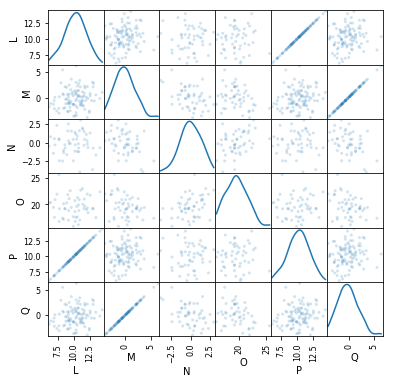

In [53]:
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

### 11. Find out the linkage matrix

Use ward as linkage metric and distance as Eucledian

In [54]:
from sklearn.cluster import AgglomerativeClustering

In [55]:
df = df.fillna(df.mean())

In [56]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='ward')

In [57]:
model.fit(df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=6,
            pooling_func='deprecated')

In [58]:
df['labels'] = model.labels_

In [59]:
df.groupby(["labels"]).count()

,L,M,N,O,P,Q
labels,,,,,,
0,11,11,11,11,11,11
1,29,29,29,29,29,29
2,21,21,21,21,21,21
3,10,10,10,10,10,10
4,22,22,22,22,22,22
5,7,7,7,7,7,7


In [60]:
df_clusters = df.groupby(['labels'])

In [61]:
type(df_clusters)

pandas.core.groupby.DataFrameGroupBy

In [62]:
df_groups=df_clusters.head(100)

In [63]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

Using ward as linkage metric and distance as Eucledian

In [64]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [65]:
df_groups.shape

(100, 7)

In [67]:
Z = linkage(df, 'ward')
Z

array([[7.70000000e+01, 8.10000000e+01, 1.54034579e-01, 2.00000000e+00],
       [6.00000000e+01, 9.90000000e+01, 2.53636785e-01, 2.00000000e+00],
       [8.30000000e+01, 9.70000000e+01, 3.33582454e-01, 2.00000000e+00],
       [5.10000000e+01, 6.70000000e+01, 3.35612667e-01, 2.00000000e+00],
       [6.60000000e+01, 8.20000000e+01, 3.58867509e-01, 2.00000000e+00],
       [5.60000000e+01, 6.40000000e+01, 4.17199034e-01, 2.00000000e+00],
       [5.00000000e+01, 8.90000000e+01, 4.39553671e-01, 2.00000000e+00],
       [9.40000000e+01, 1.01000000e+02, 4.75266030e-01, 3.00000000e+00],
       [8.00000000e+01, 9.00000000e+01, 5.21762705e-01, 2.00000000e+00],
       [8.60000000e+01, 8.70000000e+01, 5.23699138e-01, 2.00000000e+00],
       [6.20000000e+01, 6.80000000e+01, 5.88900700e-01, 2.00000000e+00],
       [6.50000000e+01, 7.10000000e+01, 6.13609719e-01, 2.00000000e+00],
       [9.30000000e+01, 1.02000000e+02, 6.46492563e-01, 3.00000000e+00],
       [7.30000000e+01, 9.60000000e+01, 6.62118381e

### 12. Plot the dendrogram for the consolidated dataframe

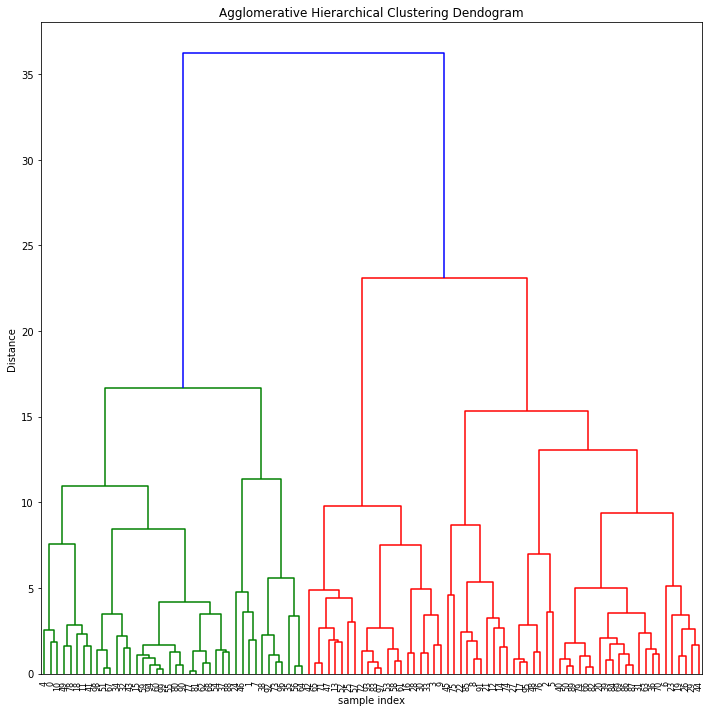

In [68]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

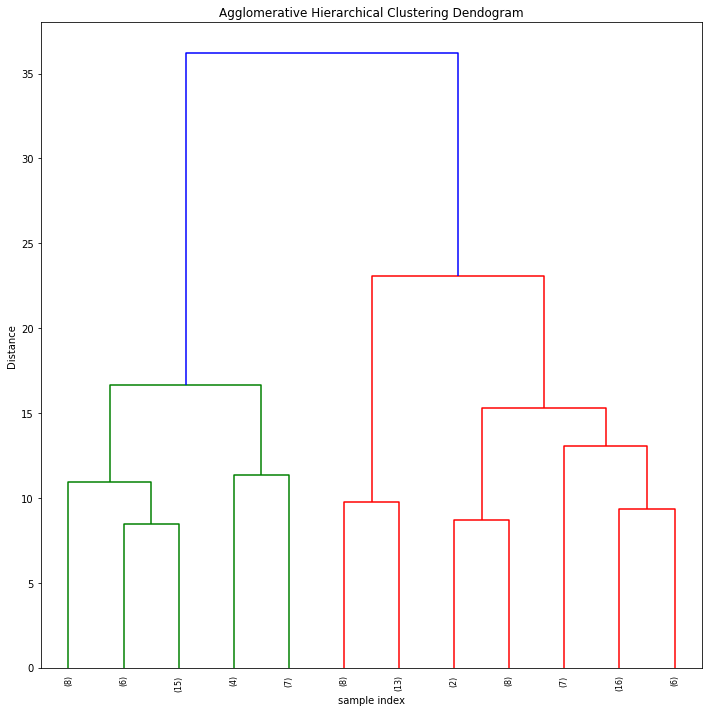

In [69]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,p=12, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8.,truncate_mode='lastp' )
plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

The optimal distance between clusters = 20

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [70]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, 24, criterion='distance')

### Use matplotlib to visually observe the clusters in 2D space 

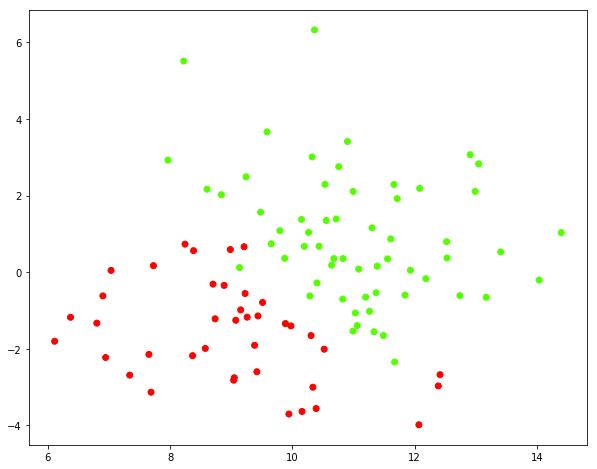

In [72]:
plt.figure(figsize=(10, 8))
plt.scatter(df.loc[:,'L'],df.loc[:,'M'], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()